# DMG2 Assignment : Problem 5

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KernelDensity

In [2]:
DATA_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/hw_assignment1/dmg2/datasets/mnist'

In [3]:
train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [4]:
train.shape

(36470, 785)

In [5]:
test.shape

(24190, 785)

In [6]:
train[train.isnull().any(axis=1)].groupby(by='label')['label'].value_counts()

label  label
4      4         46
5      5        299
6      6          1
8      8         42
Name: label, dtype: int64

In [7]:
test[test.isnull().any(axis=1)].groupby(by='label')['label'].value_counts()

label  label
4      4         35
5      5        203
6      6          4
8      8         30
Name: label, dtype: int64

**There are missing values in both the training and test data. Shown above is the count of rows with missing values, and the associated labels.**

In [8]:
train.groupby(by='label')['label'].value_counts()

label  label
0      0        3567
1      1        4034
2      2        3582
3      3        3677
4      4        3567
5      5        3567
6      6        3567
7      7        3763
8      8        3567
9      9        3579
Name: label, dtype: int64

In [9]:
test.groupby(by='label')['label'].value_counts()

label  label
0      0        2356
1      1        2708
2      2        2376
3      3        2454
4      4        2356
5      5        2356
6      6        2356
7      7        2502
8      8        2356
9      9        2370
Name: label, dtype: int64

Considering the number of complete data for each label, we can safely remove the rows with missing values for our analysis.

In [10]:
train = train.dropna()
test = test.dropna()

In [11]:
train.isnull().values.any()

False

In [12]:
test.isnull().values.any()

False

There are no missing values in the training and test data now

In [13]:
X_train = train.iloc[:,:784]
Y_train = train.iloc[:,784]

X_test = test.iloc[:,:784]
Y_test = test.iloc[:,784]

In [14]:
# Standardizing feature values
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## Applying PCA

In [15]:
# Applying PCA
pc = PCA(n_components=9).fit_transform(X_train)
d1_train = pd.DataFrame(data=pc,columns=['pc{0}'.format(i) for i in range(1,10)])
d1_train['label'] = Y_train.values
d1_train.head(5)

pc = PCA(n_components=9).fit_transform(X_test)
d1_test = pd.DataFrame(data=pc,columns=['pc{0}'.format(i) for i in range(1,10)])
d1_test['label'] = Y_test.values
d1_test.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,label
0,1.751834,-6.389571,-2.021026,-2.695768,-6.427609,1.027438,-0.557199,5.244468,3.816839,0
1,5.884346,-7.690677,-2.390823,0.259317,-4.921341,-0.378773,0.300751,6.506214,3.166817,0
2,16.381099,5.663313,-1.865705,-3.369020,4.356255,-3.093924,-5.652015,-3.865860,2.440631,0
3,12.814312,-7.638294,-4.434576,-7.659290,-0.550427,-1.781151,-0.054149,1.839341,0.582637,0
4,11.123288,7.252424,5.007020,-0.333130,15.015856,-0.073809,-1.017359,-2.396890,-0.047272,0


## Applying Fisher LDA

In [16]:
fisher = LinearDiscriminantAnalysis(n_components=9).fit_transform(X_train,Y_train.astype('int'))
d2_train = pd.DataFrame(data=fisher,columns=['f{0}'.format(i) for i in range(1,10)])
d2_train['label'] = Y_train.values
d2_train.head(5)

fisher = LinearDiscriminantAnalysis(n_components=9).fit_transform(X_test,Y_test.astype('int'))
d2_test = pd.DataFrame(data=fisher,columns=['f{0}'.format(i) for i in range(1,10)])
d2_test['label'] = Y_test.values
d2_test.head(5)

/home/jishnu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/jishnu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/jishnu/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,f1,f2,f3,f4,f5,f6,f7,f8,f9,label
0,-2.833687,-1.079133,-0.845838,-0.764987,-0.484096,0.313129,-0.955681,-0.997196,1.076134,0
1,-3.849851,-3.435085,-1.935596,0.478846,-2.420500,-0.475621,0.572627,-0.989022,0.779083,0
2,-3.350865,-4.500847,-3.900589,-1.086583,-2.654538,-1.739049,-1.565408,-0.213139,-0.024020,0
3,-3.283216,-2.503597,-3.138834,-0.103059,-1.582149,-0.295842,1.330582,-3.239352,1.473339,0
4,-2.231976,-1.552025,-3.889057,-0.017441,-0.577388,-2.299944,-0.684894,0.945457,0.404140,0


## k-Nearest Neighbors Classification

In [17]:
d1_train_X = d1_train.iloc[:,:9]
d1_train_Y = d1_train.iloc[:,9].astype('int')

d1_test_X = d1_test.iloc[:,:9]
d1_test_Y = d1_test.iloc[:,9].astype('int')

d2_train_X = d2_train.iloc[:,:9]
d2_train_Y = d2_train.iloc[:,9].astype('int')

d2_test_X = d2_test.iloc[:,:9]
d2_test_Y = d2_test.iloc[:,9].astype('int')

In [18]:
d1_knn = pd.DataFrame(columns=['k','acc_type','acc'])
d2_knn = pd.DataFrame(columns=['k','acc_type','acc'])

In [19]:
for k in range(1,18,2):
    knn1 = KNeighborsClassifier(n_neighbors=k).fit(d1_train_X,d1_train_Y)
    knn2 = KNeighborsClassifier(n_neighbors=k).fit(d2_train_X,d2_train_Y)
    d1_knn = d1_knn.append({'k' : k, 'acc_type' : 'training', 'acc' : np.round(knn1.score(d1_train_X,d1_train_Y),4)},ignore_index=True)
    d1_knn = d1_knn.append({'k' : k, 'acc_type' : 'test', 'acc' : np.round(knn1.score(d1_test_X,d1_test_Y),4)},ignore_index=True)
    d2_knn = d2_knn.append({'k' : k, 'acc_type' : 'training', 'acc' : np.round(knn2.score(d2_train_X,d2_train_Y),4)},ignore_index=True)
    d2_knn = d2_knn.append({'k' : k, 'acc_type' : 'test', 'acc' : np.round(knn2.score(d2_test_X,d2_test_Y),4)},ignore_index=True)


In [20]:
d1_knn.head()

,k,acc_type,acc
0,1,training,1.0000
1,1,test,0.7041
2,3,training,0.9329
3,3,test,0.7238
4,5,training,0.9203


### Plotting training and test accuracy for kNN Classification

**D1 Dataset**

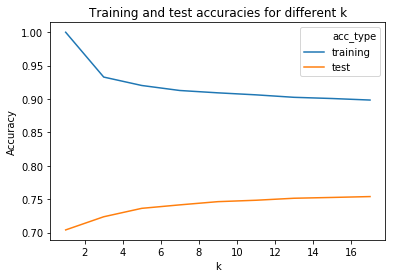

In [21]:
sns.lineplot(x='k',y='acc',hue='acc_type',data=d1_knn,ci=0,)
plt.title('Training and test accuracies for different k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show();

**D2 Dataset**

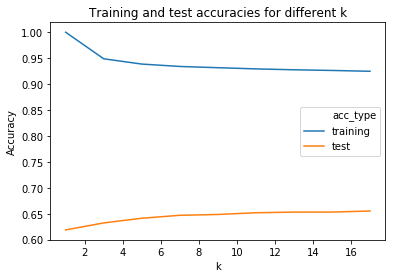

In [22]:
sns.lineplot(x='k',y='acc',hue='acc_type',data=d2_knn,ci=0,)
plt.title('Training and test accuracies for different k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show();

## Parzen-Window Classification

In [25]:
pw = KernelDensity(bandwidth=0.1,kernel='gaussian').fit(d1_train_X,d1_train_Y)
pw

-18926886.301592611

In [30]:
sample_score = pw.score_samples(d1_test_X)